Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


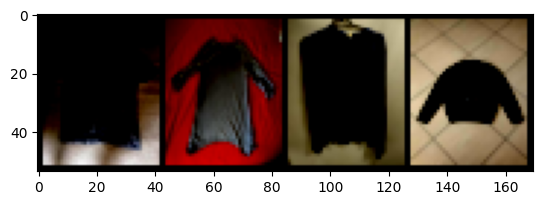

t-shirt longsleeve longsleeve longsleeve


In [11]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.optim as optim
from architectures import VGG

transform_height = 50
transform_width= int(0.8*transform_height)

transform = transforms.Compose(
    [transforms.ToTensor(),transforms.Normalize(0.5,0.5),transforms.Resize((transform_height,transform_width),antialias=True)])

batch_size = 4
data_dir = '/Users/user/MODELS/images'

trainset = torchvision.datasets.ImageFolder(data_dir + '/train', transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.ImageFolder(data_dir + '/test', transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=True, num_workers=2)

classes = ('dress','hat','longsleeve','outwear','pants','shirt','shoes','shorts','skirt','t-shirt')

def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

# net = torchvision.models.densenet.DenseNet(num_classes=10)
net = VGG()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [12]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    batches = len(trainloader)
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 50 == 49:
            print(f'[{epoch + 1}, {i + 1:5d}/{batches}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,    50/767] loss: 0.059
[1,   100/767] loss: 0.057
[1,   150/767] loss: 0.057
[1,   200/767] loss: 0.055
[1,   250/767] loss: 0.053
[1,   300/767] loss: 0.054
[1,   350/767] loss: 0.054
[1,   400/767] loss: 0.053
[1,   450/767] loss: 0.052
[1,   500/767] loss: 0.052
[1,   550/767] loss: 0.045
[1,   600/767] loss: 0.051
[1,   650/767] loss: 0.049
[1,   700/767] loss: 0.045
[1,   750/767] loss: 0.045
[2,    50/767] loss: 0.046
[2,   100/767] loss: 0.043
[2,   150/767] loss: 0.044
[2,   200/767] loss: 0.043
[2,   250/767] loss: 0.041
[2,   300/767] loss: 0.044
[2,   350/767] loss: 0.040
[2,   400/767] loss: 0.042
[2,   450/767] loss: 0.040
[2,   500/767] loss: 0.039
[2,   550/767] loss: 0.039
[2,   600/767] loss: 0.041
[2,   650/767] loss: 0.039
[2,   700/767] loss: 0.040
[2,   750/767] loss: 0.036
Finished Training


Accuracy of the network on the test images: 45 %
Accuracy for class: dress is 80.0 %
Accuracy for class: hat   is 0.0 %
Accuracy for class: longsleeve is 72.2 %
Accuracy for class: outwear is 7.9 %
Accuracy for class: pants is 95.2 %
Accuracy for class: shirt is 0.0 %
Accuracy for class: shoes is 28.8 %
Accuracy for class: shorts is 23.3 %
Accuracy for class: skirt is 0.0 %
Accuracy for class: t-shirt is 71.2 %


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


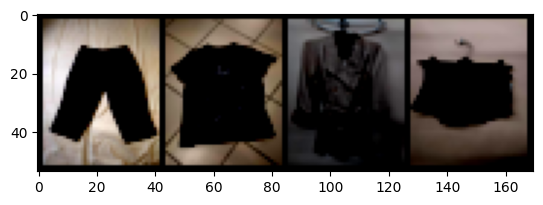

GroundTruth:  shorts t-shirt outwear shorts
Predicted:  pants t-shirt outwear outwear
Accuracy of the network on the test images: 49 %
Accuracy for class: dress is 73.3 %
Accuracy for class: hat   is 0.0 %
Accuracy for class: longsleeve is 75.0 %
Accuracy for class: outwear is 13.2 %
Accuracy for class: pants is 95.2 %
Accuracy for class: shirt is 0.0 %
Accuracy for class: shoes is 35.6 %
Accuracy for class: shorts is 26.7 %
Accuracy for class: skirt is 0.0 %
Accuracy for class: t-shirt is 69.2 %


In [14]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

net = VGG()
net.load_state_dict(torch.load(PATH))
outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the test images: {100 * correct // total} %')

# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')